In [40]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
import tensorflow as tf
import os
import mtcnn

In [83]:
#this model is made using pretrained vgg face model model

from tensorflow.keras.models import load_model
model = load_model('vgg_face_model.h5/vgg_face_model.h5')

In [84]:
model.pop()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [5]:
import os
celebNames=os.listdir("../AllFace/celebs/celebs/")

In [87]:
personsList=os.listdir("../AllFace/celebs/celebs")
persons=[]
##Generating list of persons facial feature vectors 
for i in personsList:
    dts=tf.keras.preprocessing.image_dataset_from_directory("../AllFace/celebs/celebs"+"/"+i, color_mode='rgb',label_mode=None, batch_size=32, image_size=(224,224))
    persons.append(model.predict(dts))

Found 127 files belonging to 1 classes.
Found 65 files belonging to 1 classes.
Found 89 files belonging to 1 classes.
Found 99 files belonging to 1 classes.
Found 125 files belonging to 1 classes.
Found 95 files belonging to 1 classes.
Found 73 files belonging to 1 classes.
Found 110 files belonging to 1 classes.
Found 134 files belonging to 1 classes.
Found 94 files belonging to 1 classes.
Found 112 files belonging to 1 classes.
Found 99 files belonging to 1 classes.
Found 101 files belonging to 1 classes.
Found 85 files belonging to 1 classes.
Found 125 files belonging to 1 classes.
Found 117 files belonging to 1 classes.
Found 94 files belonging to 1 classes.
Found 78 files belonging to 1 classes.
Found 89 files belonging to 1 classes.
Found 134 files belonging to 1 classes.
Found 102 files belonging to 1 classes.
Found 75 files belonging to 1 classes.
Found 100 files belonging to 1 classes.
Found 68 files belonging to 1 classes.
Found 146 files belonging to 1 classes.
Found 121 fil

In [23]:
new_x=[]
new_y=[]
for i in range(len(x)):
    shp=x[i].shape
    if(shp[0]>=112 and shp[1]>=112):
        new_x.append(cv2.resize(x[i],(224, 224)).astype(np.float32))
        new_y.append(y[i])
del(x)
del(y)
del(i)
del(shp)

IndexError: tuple index out of range

In [5]:
#

In [88]:
# so now the data is seperated .. we can analyse the daata

# Ist analysys should be . on an average how close the facial feature of same person are.
def calcualteFacialCenters(facialValues):
    pass
    
FacialCenters=[]
for i in persons:
    FCP=np.zeros(2622)#this will store facial center of one person.
    
    #Adding all the feature from the face
    for y in i:
        FCP+=y
    
    for x in range(len(FCP)):# Averaging out the features to get average value of the features
        FCP[x]/=len(i)
    FacialCenters.append(FCP)
        
        

# Now finding out the suitable distance for a given face


In [89]:
##calcualting  average distance for the faces

#things to calculate 
# 1. Max distance beetween same faces. (Average maximum)
# 2. Min distance beetweeb same faces. (Average min)
# 3. Distance of all faces from their facial centers.
#    Using the above distance calculate : 
#    a. Average distance for each face.
#    b. RMS Distance for each face. 
#    
#
#
#
#
#
#
#######################
# THINGS TO CALCULATE
Dist=[]#for each face

#per person Calculation
maxDist=[]
minDist=[]
averageDist=[]
RMSDist=[]
#######################

for person in range(len(persons)):
    mx=0
    mn=9999999
    avg=0
    rms=0
    dst=[]
    for face in persons[person]:
        dis=distance.euclidean(FacialCenters[person], face)
        dst.append(dis)
        avg+=dis
        rms+=dis**2
        if(mx<dis):
            mx=dis
        if(mn>dis):
            mn=dis
    Dist.append(dst)
    avg/=len(persons[person])
    rms/=len(persons[person])
    rms=rms**(0.5)
    maxDist.append(mx)
    minDist.append(mn)
    averageDist.append(avg)
    RMSDist.append(rms)
    
    

# Average Distance analysis

In [90]:
print(max(averageDist))
print(min(averageDist))

116.07098755495797
83.78010794928713


# RMS Distance analysis

In [91]:
print(max(RMSDist)) # 58% acuracy (only positive test cases)
print(min(RMSDist)) 

118.33879513885118
86.66740476943605


In [92]:
print(max(maxDist)) #98% acuracy (only positive test cases)
print(min(maxDist))

277.25957578014396
131.28955430170782


In [93]:
print(max(minDist))
print(min(minDist))

82.08503251089581
52.004867950900234


## Now there is need to analyse what results we get while using different different values .(on completely new dataset. )

NameError: name 'pred_dist' is not defined

In [96]:
AC,Fac=FindFacialAcuracy(model,"../AllFace/crop_faces/faces",116.07098755495797)

Found 13 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
Found 30 files belonging to 1 classes.
Found 27 files belonging to 1 classes.
Found 20 files belonging to 1 classes.
Found 32 files belonging to 1 classes.
Found 14 files belonging to 1 classes.
Found 18 files belonging to 1 classes.
Found 12 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
Found 69 files belonging to 1 classes.
Found 13 files belonging to 1 classes.
Found 33 files belonging to 1 classes.
Found 21 files belonging to 1 classes.
Found 25 files belonging to 1 classes.
Found 16 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
Found 13 files belonging to 1 classes.
Found 14 files belonging to 1 classes.
Found 17 files belonging to 1 classes.
Found 18 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
Found 7 files belonging to 1 classes.
Found 205 files belonging to 1 classes.
Found 8 files belonging to 1 classes.
Found 29 files belonging to 

In [33]:
#FacialAcuracyCalculator
def FindFacialAcuracy(mdl,ParentDirectory,RadiusValue):
    personsList=os.listdir(ParentDirectory)
    persons=[]
    
    ##Generating list of persons facial feature vectors 
    for i in personsList:
        dts=tf.keras.preprocessing.image_dataset_from_directory(ParentDirectory+"/"+i, color_mode='rgb',label_mode=None, batch_size=32, image_size=(224,224))
        persons.append(mdl.predict(dts))
    
    #creating facial point . that we will consider as center (This will be formed using single image) .. 
    #the model needs to do predictions using single image and that will be tested here
    
    
    ##Acuracy Calculator = TotalRightPridictions/TotalPredictions
    AcuracyOverAll=0
    facialAcuracy=[]
    total=0
    for i in persons:
        ac=0
        for y in i:
            if(distance.euclidean(i[0], y)<=RadiusValue):
                ac+=1
            total+=1
        AcuracyOverAll+=ac
        facialAcuracy.append(ac/len(i))
    AcuracyOverAll/=total
    
    
    #Calculating negitive acuracy 
    NcuracyOverAll=0
    NacialAcuracy=[]
    Ntotal=0
    for i in persons:
        ac=0
        for y in i:
            if(distance.euclidean(i[0], y)<=RadiusValue):
                ac+=1
            total+=1
        AcuracyOverAll+=ac
        facialAcuracy.append(ac/len(i))
    AcuracyOverAll/=total
    
    return(AcuracyOverAll,facialAcuracy)
        
    
    
    
    
    

In [97]:
print(AC)
print(Fac)

0.5601952277657267
[0.7692307692307693, 0.1111111111111111, 0.7, 0.48148148148148145, 0.25, 0.3125, 0.07142857142857142, 0.05555555555555555, 0.08333333333333333, 0.2222222222222222, 0.8260869565217391, 0.7692307692307693, 0.6363636363636364, 0.19047619047619047, 0.72, 0.0625, 0.7, 0.5384615384615384, 0.14285714285714285, 1.0, 0.8333333333333334, 0.1, 0.8571428571428571, 0.926829268292683, 1.0, 0.034482758620689655, 0.5, 0.8571428571428571, 0.2857142857142857, 0.822429906542056, 0.8333333333333334, 0.09090909090909091, 0.14285714285714285, 0.07692307692307693, 0.8421052631578947, 0.6302325581395349, 0.6739130434782609, 0.41025641025641024, 0.6666666666666666, 0.45454545454545453, 0.55, 0.13793103448275862, 0.7692307692307693, 0.05555555555555555, 0.9615384615384616, 0.6, 0.4166666666666667, 0.36363636363636365, 0.02, 0.8571428571428571, 0.2, 0.8, 0.2727272727272727, 0.8888888888888888, 0.8958333333333334, 1.0, 0.75, 0.8181818181818182, 0.125, 1.0, 0.6153846153846154, 0.82, 0.5, 1.0, 0.

In [25]:
tf.keras.preprocessing.image_dataset_from_directory("../AllFace/crop_faces/faces"+"/"+"Abdullah_Gul", image_size=(224,224),interpolation='bilinear',label_mode=None)

Found 13 files belonging to 1 classes.


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

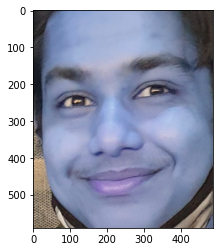

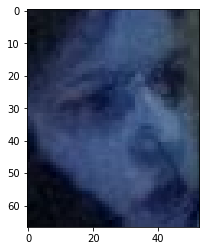

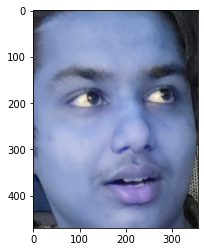

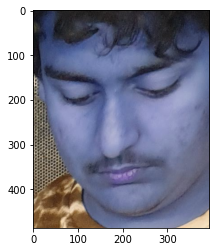

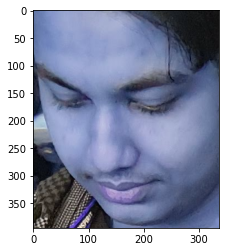

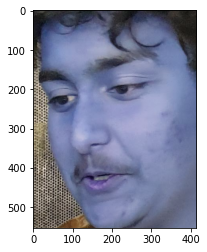

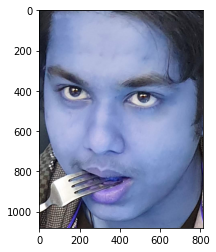

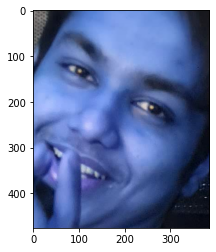

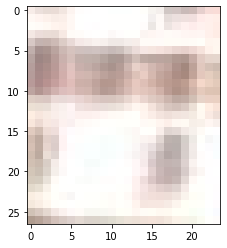

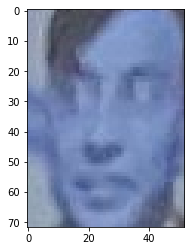

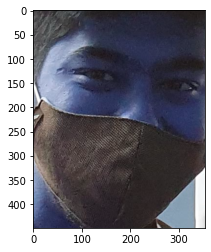

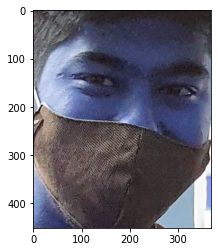

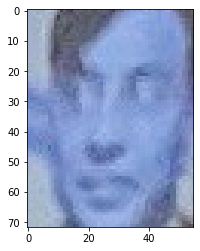

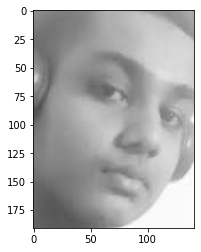

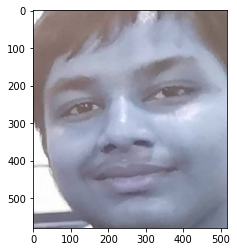

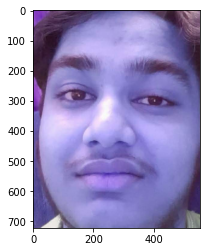

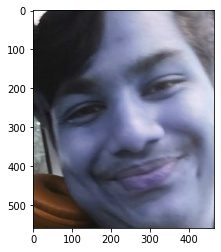

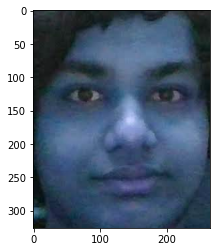

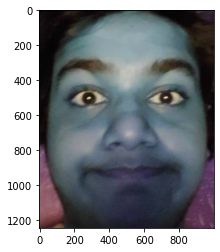

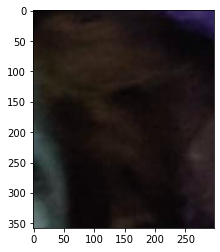

In [98]:
### LETS DEtect Punethas face
Path="../PunethaFace/Photos"

#Extract face 

detector=mtcnn.mtcnn.MTCNN()
faces=[]
for i in os.listdir(Path):
    img=cv2.imread(Path+"/"+i)
    #plt.imshow(img)
    #plt.show()
    try:
        fcs=detector.detect_faces(img)
    except:
        continue
    for fc in fcs:
        if(fc['confidence']>0.90):
            x1, y1, width, height = fc['box']
            faces.append(img[y1:y1+height,x1:x1 + width])
            plt.imshow(img[y1:y1+height,x1:x1 + width])
            plt.show()

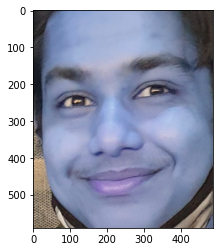

In [99]:
plt.imshow(faces[0])
centerFace=model.predict(np.array([cv2.resize(faces[0],(224, 224) ),]))

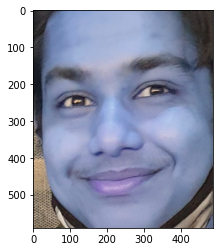

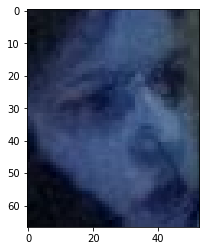

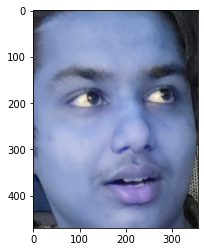

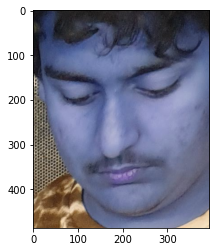

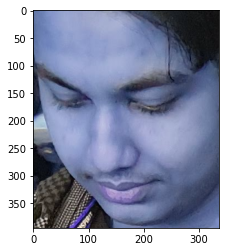

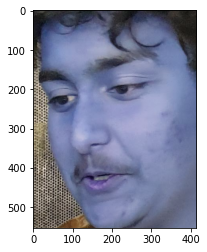

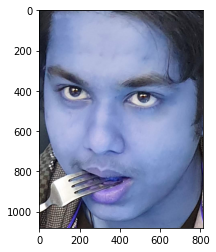

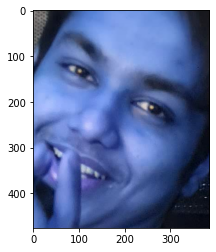

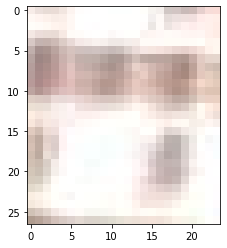

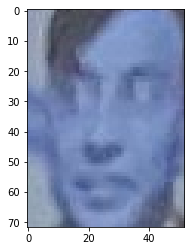

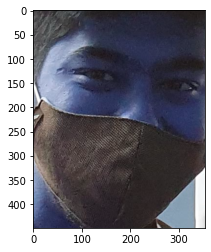

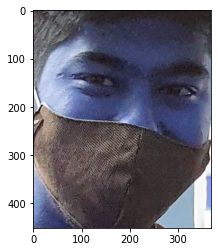

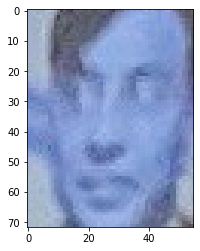

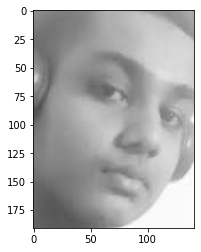

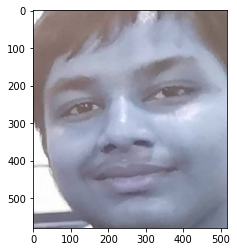

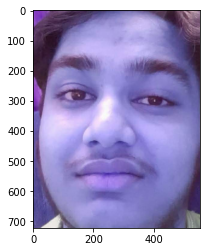

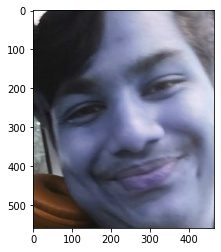

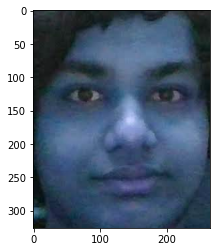

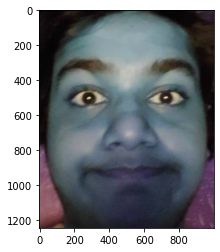

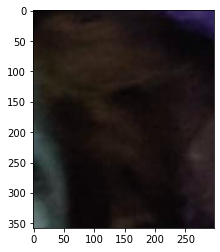

In [103]:
for i in faces:
    if(distance.euclidean(model.predict(np.array([cv2.resize(i,(224, 224) ),])), centerFace)<=220):
        plt.imshow(i)
        plt.show()

In [72]:
face[0].shape

()